# **🔍Crime Data Analysis and Classification🔍**

In our project we have applied 3 classification models on our crime_dataset_india which was highly imbalanced. 

# **Importing Libraries**
---

Pandas (pandas) – For data manipulation and analysis

NumPy (numpy) – For numerical computations

Seaborn (seaborn) – For data visualization

Matplotlib (matplotlib.pyplot) – For plotting graphs

Scikit-learn (sklearn) modules:

sklearn.model_selection – For splitting data into training and test sets (train_test_split)

sklearn.preprocessing – For data preprocessing (StandardScaler, LabelEncoder)

sklearn.linear_model – For logistic regression (LogisticRegression)

sklearn.svm – For support vector classification (SVC)

sklearn.ensemble – For random forest classification (RandomForestClassifier)

sklearn.metrics – For evaluating model performance (accuracy_score, classification_report, confusion_matrix)

Streamlit (streamlit) – For building interactive web applications


---



In [1]:
import pandas as pd
import numpy as np

In [2]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# **Loading Dataset**
---



In [7]:
df = pd.read_csv("balanced_crime_dataset_india .csv")
df.head(10)

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Crime Category,Crime_Label
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,Violent,1
1,6,02-01-2020 03:00,01-01-2020 05:00,01-01-2020 17:09,Delhi,442,ASSAULT,16,M,Firearm,Violent Crime,18,Yes,30-03-2020 03:00,Violent,1
2,7,01-01-2020 16:00,01-01-2020 06:00,01-01-2020 14:08,Chennai,172,VEHICLE - STOLEN,64,F,Knife,Violent Crime,13,Yes,24-03-2020 16:00,Violent,1
3,12,03-01-2020 09:00,01-01-2020 11:00,01-01-2020 22:16,Surat,563,IDENTITY THEFT,26,M,Poison,Violent Crime,3,No,NaN,Violent,1
4,14,02-01-2020 22:00,01-01-2020 13:00,01-01-2020 17:46,Mumbai,436,ASSAULT,32,X,NaN,Violent Crime,18,No,NaN,Violent,1
5,15,02-01-2020 00:00,01-01-2020 14:00,01-01-2020 22:28,Bangalore,266,SEXUAL ASSAULT,77,F,NaN,Violent Crime,19,No,NaN,Violent,1
6,18,04-01-2020 02:00,01-01-2020 17:00,01-01-2020 23:09,Pune,342,ARSON,64,F,Other,Fire Accident,2,No,NaN,Violent,1
7,21,03-01-2020 22:00,01-01-2020 20:00,02-01-2020 02:33,Hyderabad,251,TRAFFIC VIOLATION,50,F,Poison,Traffic Fatality,14,Yes,22-01-2020 22:00,Violent,1
8,26,02-01-2020 16:00,01-02-2020 01:00,02-01-2020 08:21,Jaipur,282,ASSAULT,60,M,Firearm,Violent Crime,15,Yes,12-03-2020 16:00,Violent,1
9,27,02-01-2020 06:00,01-02-2020 02:00,02-01-2020 04:02,Pune,247,IDENTITY THEFT,49,M,Blunt Object,Violent Crime,13,No,NaN,Violent,1


In [8]:
df = df.drop(columns = ['Report Number','Crime Category', 'Crime Domain', 'Date Reported', 'Date Case Closed', "Date of Occurrence", "Time of Occurrence"])
df_1 = df.copy()

# **Encoding Categorical Variables**

---


“LabelEncoder” is used to convert all categorical columns from df_1 into integers that can be used in models. So the transformation performs Label encoding, which translates categorical features into numerical values.

---





In [9]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df_1.select_dtypes(include=['object']).columns  # Find string columns
encoder = LabelEncoder()

for col in categorical_cols:
    df_1[col] = encoder.fit_transform(df_1[col])  # Apply Label Encoding to each categorical column

print(df_1)

       City  Crime Code  Crime Description  Victim Age  Victim Gender  \
0         1         576                 11          16              1   
1         5         442                  1          16              1   
2         4         172                 20          64              0   
3        24         563                 11          26              1   
4        17         436                  1          32              2   
...     ...         ...                ...         ...            ...   
36207     4         524                 17          10              0   
36208    21         249                 17          40              0   
36209     0         446                  3          23              2   
36210    18         309                 17          38              0   
36211    24         556                  6          25              1   

       Weapon Used  Police Deployed  Case Closed  Crime_Label  
0                0               13            0           

# **Dropping target variabel from X.**

---



In [10]:
X = df_1.drop(columns=["Crime_Label"])
y = df_1["Crime_Label"] 

print(X.head())
print('\n----------\n')
print(y)

   City  Crime Code  Crime Description  Victim Age  Victim Gender  \
0     1         576                 11          16              1   
1     5         442                  1          16              1   
2     4         172                 20          64              0   
3    24         563                 11          26              1   
4    17         436                  1          32              2   

   Weapon Used  Police Deployed  Case Closed  
0            0               13            0  
1            2               18            1  
2            3               13            1  
3            5                3            0  
4            6               18            0  

----------

0        1
1        1
2        1
3        1
4        1
        ..
36207    0
36208    0
36209    0
36210    0
36211    0
Name: Crime_Label, Length: 36212, dtype: int64


In [66]:
X.tail(2)

,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Police Deployed,Case Closed
36210,18,309,17,38,0,1,14,1
36211,24,556,6,25,1,6,4,0


In [67]:
y.tail(2)

36210    0
36211    0
Name: Crime_Label, dtype: int64

# **Data Splitting and Standardization**

---


The dataset is split into training and test sets using an 80-20 ratio. Then, StandardScaler is applied to normalize the features, improving model performance.

---



In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **1) Applying Logistic Regression**

---



Logistic Regression Accuracy: 0.5955 



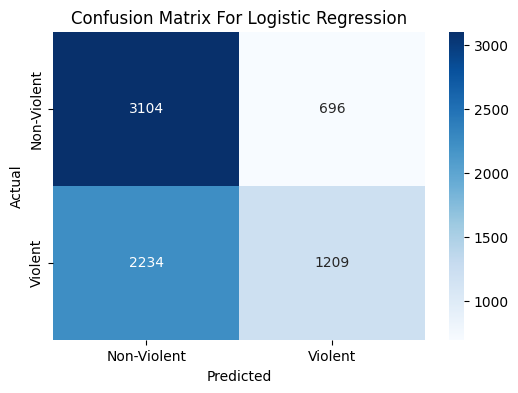


🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.58      0.82      0.68      3800
           1       0.63      0.35      0.45      3443

    accuracy                           0.60      7243
   macro avg       0.61      0.58      0.57      7243
weighted avg       0.61      0.60      0.57      7243



In [69]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Accuracy
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}","\n")

conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Violent", "Violent"], yticklabels=["Non-Violent", "Violent"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For Logistic Regression")
plt.show()

# Full Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test, y_pred_log_reg))

# **2) Applying SVMs ( Support Vector Machines)**

---




1.   Linear Kernel
2.   RBF Kernel
3.   Polynomial Kernel



---










**`1) Linear Kernel SVM`**

SVM (Linear Kernel) Accuracy: 0.5246

----------



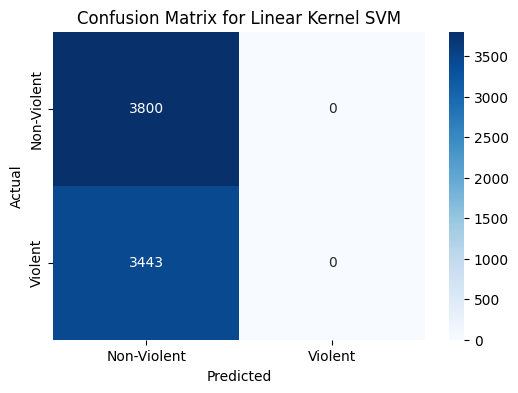


🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.52      1.00      0.69      3800
           1       0.00      0.00      0.00      3443

    accuracy                           0.52      7243
   macro avg       0.26      0.50      0.34      7243
weighted avg       0.28      0.52      0.36      7243



C:\Users\Vivek\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vivek\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vivek\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [70]:
svm_linear = SVC(kernel="linear") 

# Train the models
svm_linear.fit(X_train, y_train)

# Predictions
y_pred_svm_linear = svm_linear.predict(X_test)

svm_linear_acc = accuracy_score(y_test, y_pred_svm_linear)
print(f"SVM (Linear Kernel) Accuracy: {svm_linear_acc:.4f}")
print("\n----------\n")


conf_matrix = confusion_matrix(y_test, y_pred_svm_linear)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Violent", "Violent"], yticklabels=["Non-Violent", "Violent"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Linear Kernel SVM")
plt.show()

# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test, y_pred_svm_linear))


**2) RBF Kernel SVM**

SVM (RBF Kernel) Accuracy: 0.6982

----------



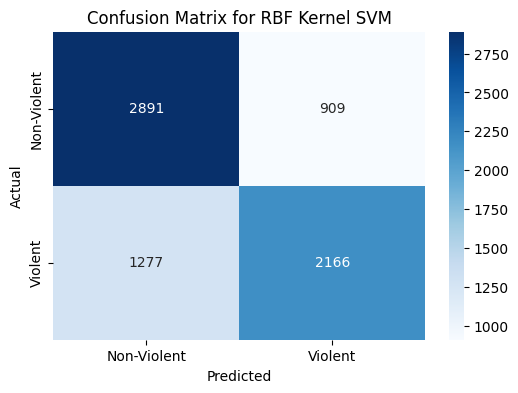


🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.76      0.73      3800
           1       0.70      0.63      0.66      3443

    accuracy                           0.70      7243
   macro avg       0.70      0.69      0.70      7243
weighted avg       0.70      0.70      0.70      7243



In [71]:
svm_rbf = SVC(kernel="rbf") 

svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)

svm_rbf_acc = accuracy_score(y_test, y_pred_svm_rbf)
print(f"SVM (RBF Kernel) Accuracy: {svm_rbf_acc:.4f}")
print("\n----------\n")

conf_matrix = confusion_matrix(y_test, y_pred_svm_rbf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Violent", "Violent"], yticklabels=["Non-Violent", "Violent"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RBF Kernel SVM")
plt.show()

# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test, y_pred_svm_rbf))

**3) Polynomial Kernel SVM**

SVM (Polynomial Kernel) Accuracy: 0.6573

--------



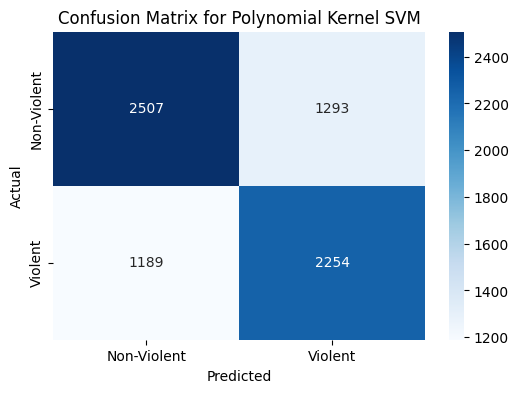


🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      3800
           1       0.64      0.65      0.64      3443

    accuracy                           0.66      7243
   macro avg       0.66      0.66      0.66      7243
weighted avg       0.66      0.66      0.66      7243



In [72]:
svm_poly = SVC(kernel="poly", degree=3) 

svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)


svm_poly_acc = accuracy_score(y_test, y_pred_svm_poly)
print(f"SVM (Polynomial Kernel) Accuracy: {svm_poly_acc:.4f}")
print("\n--------\n")


conf_matrix = confusion_matrix(y_test, y_pred_svm_poly)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Violent", "Violent"], yticklabels=["Non-Violent", "Violent"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Polynomial Kernel SVM")
plt.show()


# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test, y_pred_svm_poly))

# **3) Applying Random Forest Classifier**

---



Random Forest Accuracy: 0.9699019743200331
🔹 Precision: 0.9945
🔹 Recall: 0.9419
🔹 F1 Score: 0.9675
🔹 ROC-AUC Score: 0.9983


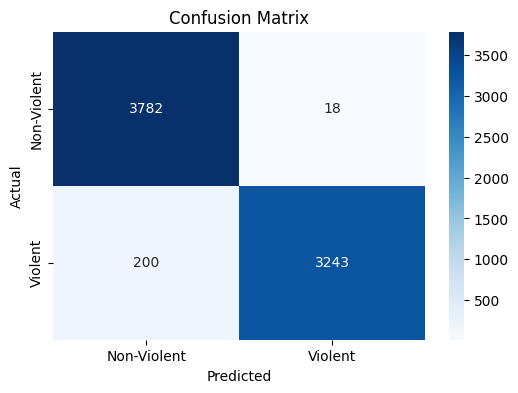


🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3800
           1       0.99      0.94      0.97      3443

    accuracy                           0.97      7243
   macro avg       0.97      0.97      0.97      7243
weighted avg       0.97      0.97      0.97      7243



In [75]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf.score(X_test, y_test))

# Predictions
y_pred_random_forest = rf.predict(X_test)
y_pred_proba_random_forest = rf.predict_proba(X_test)[:, 1]  # Only for ROC-AUC

# Precision
precision = precision_score(y_test, y_pred_random_forest)
print(f"🔹 Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred_random_forest)
print(f"🔹 Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred_random_forest)
print(f"🔹 F1 Score: {f1:.4f}")

# ROC-AUC Score (only for binary classification)
roc_auc = roc_auc_score(y_test, y_pred_proba_random_forest)
print(f"🔹 ROC-AUC Score: {roc_auc:.4f}")


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_random_forest)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Violent", "Violent"], yticklabels=["Non-Violent", "Violent"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Full Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test, y_pred_random_forest))


# **Heatmap - checking correlation with target**

---


In [76]:
df_numeric = pd.get_dummies(df, drop_first=True)
df_numeric.tail()

,Crime Code,Victim Age,Police Deployed,Crime_Label,City_Ahmedabad,City_Bangalore,City_Bhopal,City_Chennai,City_Delhi,City_Faridabad,...,Crime Description_VANDALISM,Crime Description_VEHICLE - STOLEN,Victim Gender_M,Victim Gender_X,Weapon Used_Explosives,Weapon Used_Firearm,Weapon Used_Knife,Weapon Used_Other,Weapon Used_Poison,Case Closed_Yes
36207,524,10,3,0,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
36208,249,40,1,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
36209,446,23,14,0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
36210,309,38,14,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
36211,556,25,4,0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


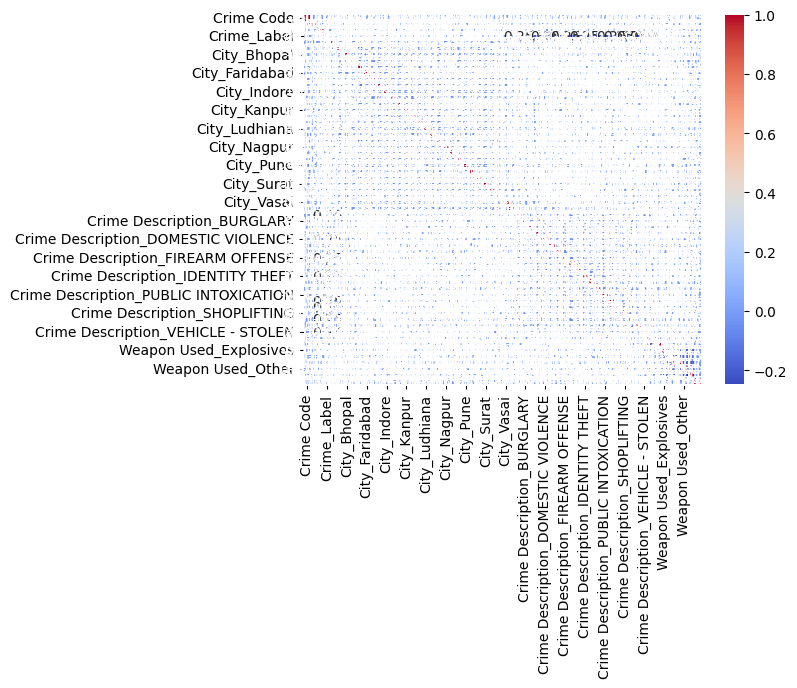

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


# **Corresponding Values for categorical columns..(encoding correspondence)**

**Refer to these numerics while inserting values in the new tuple**

---


**1) City**

In [78]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["City"] = encoder.fit_transform(df["City"])  # Assuming "City" is the column name

# Get the mapping of city names to numbers
city_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print(city_mapping)

{'Agra': 0, 'Ahmedabad': 1, 'Bangalore': 2, 'Bhopal': 3, 'Chennai': 4, 'Delhi': 5, 'Faridabad': 6, 'Ghaziabad': 7, 'Hyderabad': 8, 'Indore': 9, 'Jaipur': 10, 'Kalyan': 11, 'Kanpur': 12, 'Kolkata': 13, 'Lucknow': 14, 'Ludhiana': 15, 'Meerut': 16, 'Mumbai': 17, 'Nagpur': 18, 'Nashik': 19, 'Patna': 20, 'Pune': 21, 'Rajkot': 22, 'Srinagar': 23, 'Surat': 24, 'Thane': 25, 'Varanasi': 26, 'Vasai': 27, 'Visakhapatnam': 28}


**2) Crime Description**

In [79]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["Crime Description"] = encoder.fit_transform(df["Crime Description"]) 

# Get the mapping of city names to numbers
description_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print(description_mapping)

{'ARSON': 0, 'ASSAULT': 1, 'BURGLARY': 2, 'COUNTERFEITING': 3, 'CYBERCRIME': 4, 'DOMESTIC VIOLENCE': 5, 'DRUG OFFENSE': 6, 'EXTORTION': 7, 'FIREARM OFFENSE': 8, 'FRAUD': 9, 'HOMICIDE': 10, 'IDENTITY THEFT': 11, 'ILLEGAL POSSESSION': 12, 'KIDNAPPING': 13, 'PUBLIC INTOXICATION': 14, 'ROBBERY': 15, 'SEXUAL ASSAULT': 16, 'SHOPLIFTING': 17, 'TRAFFIC VIOLATION': 18, 'VANDALISM': 19, 'VEHICLE - STOLEN': 20}


**3) Weapon Used**

In [80]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["Weapon Used"] = encoder.fit_transform(df["Weapon Used"]) 

# Get the mapping of city names to numbers
weapon_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print(weapon_mapping)

{'Blunt Object': 0, 'Explosives': 1, 'Firearm': 2, 'Knife': 3, 'Other': 4, 'Poison': 5, nan: 6}


**4) Victim Gender**

In [81]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["Victim Gender"] = encoder.fit_transform(df["Victim Gender"]) 

# Get the mapping of city names to numbers
gender_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print(gender_mapping)

{'F': 0, 'M': 1, 'X': 2}


**5) Case Closed**

In [82]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["Case Closed"] = encoder.fit_transform(df["Case Closed"]) 

# Get the mapping of city names to numbers
case_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print(case_mapping)

{'No': 0, 'Yes': 1}


# **Classifiction of type of crime based on input tuple using Random Forest**

---


In [83]:
input_tuple_1 = (1, 576, 11, 16, 1, 0, 13, 0)  # For Violent
input_tuple_2 = (5, 442, 1, 16, 1, 2, 18, 1)  # For Violent

input_tuple_3 = (24, 556, 6, 25, 1, 6, 4, 0)  # For Non - Violent
input_tuple_4 = (18, 309, 17, 38, 0, 1, 14, 1)  # For Non - Violent

nested_tuple = (input_tuple_1,input_tuple_2,input_tuple_3,input_tuple_4)

for i in nested_tuple:
    input_array = np.array(i).reshape(1, -1)
    input_array = np.array(i).reshape(1, -1)# Convert to a NumPy array and reshape for prediction
    input_array = scaler.transform(input_array)  # Standardizing input data

    
    prediction = rf.predict(input_array)
    print("Predicted Crime Label:", prediction[0])
    
    probability = rf.predict_proba(input_array)
    print("Prediction Probabilities:", probability)


C:\Users\Vivek\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Vivek\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Vivek\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Crime Label: 1
Prediction Probabilities: [[0.18 0.82]]
Predicted Crime Label: 1
Prediction Probabilities: [[0. 1.]]
Predicted Crime Label: 0
Prediction Probabilities: [[0.8 0.2]]
Predicted Crime Label: 0
Prediction Probabilities: [[0.92 0.08]]


C:\Users\Vivek\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Installing Libraries for GUI using Streamlit**

---


In [1]:
!pip install streamlit ipywidgets pyngrok

# **Creating a file to run the Streamlit app on localhost**

---


In [2]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Streamlit UI Setup
st.title("🔍 Crime Classification in India")
st.markdown("<hr style='border: 2px solid #ccc;'>", unsafe_allow_html=True)
st.write("This app allows you to classify crimes based on input features.")

# Upload Dataset
uploaded_file = st.file_uploader("📂 Upload Crime Dataset (CSV)", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    
    # Drop unnecessary columns
    df.drop(columns=['Report Number', 'Crime Category', 'Crime Domain', 'Date Reported', 
                     'Date Case Closed', "Date of Occurrence", "Time of Occurrence"], inplace=True, errors='ignore')

    # Encode categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns
    encoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = encoder.fit_transform(df[col])
    
    # Define features and target
    X = df.drop(columns=["Crime_Label"])
    y = df["Crime_Label"]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    
    st.sidebar.subheader("City codes")
    model_choice = st.sidebar.selectbox("Choose a model", 
                                        ["Logistic Regression", "SVM (Linear)", "SVM (RBF)", "SVM (Polynomial)", "Random Forest"])
    

    # Train and Evaluate Model
    model = None
    if model_choice == "Random Forest":
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model_choice == "Logistic Regression":
        model = LogisticRegression()
    elif model_choice == "SVM (Linear)":
        model = SVC(kernel="linear")
    elif model_choice == "SVM (RBF)":
        model = SVC(kernel="rbf")
    elif model_choice == "SVM (Polynomial)":
        model = SVC(kernel="poly", degree=3)

    # Train the selected model
    if model is not None:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        st.markdown("<hr style='border: 2px solid #ccc;'>", unsafe_allow_html=True)
        st.subheader(f" Model Performance for {model_choice}")

        # Display accuracy in a centered box
        # Display accuracy in a centered box
        st.markdown(
            f"""
            <div style="text-align: center; padding: 15px; border-radius: 10px; 
                        background-color: #f8f9fa; font-size: 20px; font-weight: bold;">
                 Accuracy: {accuracy:.4f}
            </div>
            """, unsafe_allow_html=True
        )



        report_dict = classification_report(y_test, y_pred, output_dict=True)
        
        # Convert it to a DataFrame
        report_df = pd.DataFrame(report_dict).transpose()
        
        # Round values for better readability
        report_df = report_df.round(2)
        
        # Rename columns for better display
        report_df.columns = ["Precision", "Recall", "F1-Score", "Support"]
        
        # Convert DataFrame to a properly formatted table
        st.markdown("### 📝 Classification Report")
        st.dataframe(report_df.style.set_properties(**{'text-align': 'center'}))  # Ensures alignment




        # Confusion Matrix
        st.markdown("### Confusion Matrix")
        fig, ax = plt.subplots(figsize=(6, 4))
        conf_matrix = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                    xticklabels=["Non-Violent", "Violent"], yticklabels=["Non-Violent", "Violent"])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        st.pyplot(fig)

    # User Input Prediction
    st.markdown("<hr style='border: 2px solid #ccc;'>", unsafe_allow_html=True)
    st.subheader("🔍 Predict Crime Type")

    col1, col2 = st.columns(2)  # Arrange input fields in two columns
    input_features = []
    
    for idx, col in enumerate(X.columns):
        with col1 if idx % 2 == 0 else col2:
            value = st.number_input(f"{col}", value=int(df[col].mean()))
            input_features.append(value)

    if st.button("Predict"):
        input_array = np.array(input_features).reshape(1, -1)
        input_array = scaler.transform(input_array)  # Standardize input

        if model is not None:
            prediction = model.predict(input_array)
            # st.success(f"### 🔍 Predicted Crime Label: {prediction[0]}")
            if {prediction[0]} == 0:
                st.success(f"### 🔍 The Crime is Non-Violent")
            else:
                st.success(f"### 🔍 The Crime is Violent")
                
        else:
            st.error("❌ Model is not trained. Please select and train a model first.")

st.markdown("<hr style='border: 2px solid #ccc;'>", unsafe_allow_html=True)


Overwriting app.py


# **Running the app.py file**

---


In [3]:
import subprocess

# Run Streamlit in the background
subprocess.Popen(["streamlit", "run", "app.py"])


<Popen: returncode: None args: ['streamlit', 'run', 'app.py']>

# **Exploratory Data Analysis (EDA)**

---


**1)  Percentage distribution of crime victims by gender.**

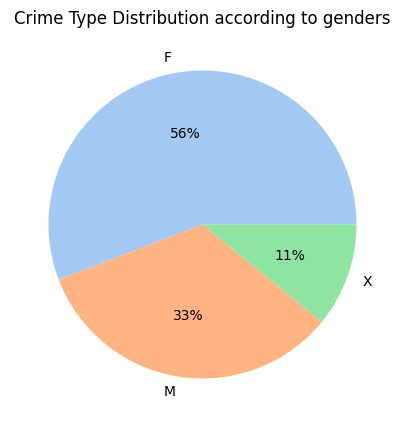

In [18]:
crime_counts = df["Victim Gender"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(crime_counts, labels=crime_counts.index, autopct='%1.0f%%', colors=sns.color_palette("pastel"))
plt.title("Crime Type Distribution according to genders")
plt.show()

**2) This histogram visualizes the distribution of crime occurrences across different cities.**

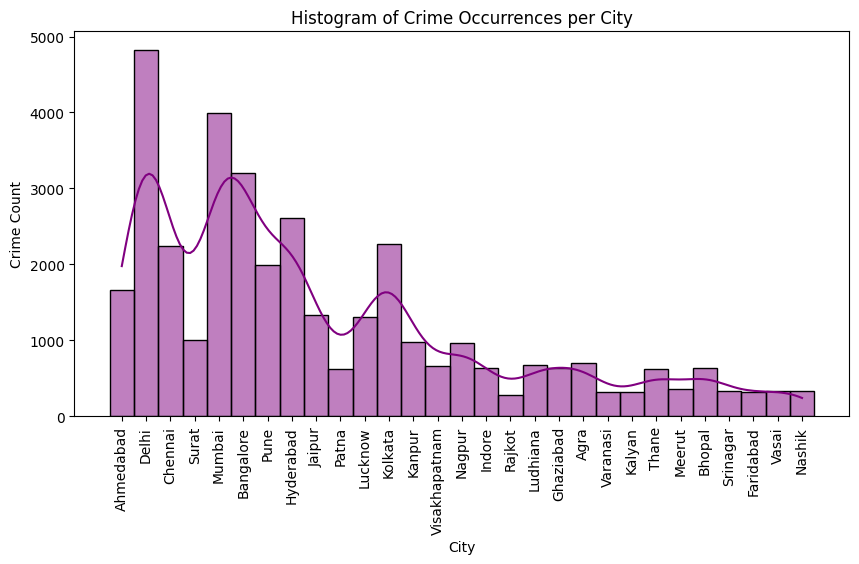

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(df["City"], bins=30, kde=True, color="purple")
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Crime Count")
plt.title("Histogram of Crime Occurrences per City")
plt.show()

**3)  This heatmap shows the frequency of different crime types across various cities. Each cell represents the number of occurrences of a specific crime in a city, with darker shades indicating higher crime frequencies**

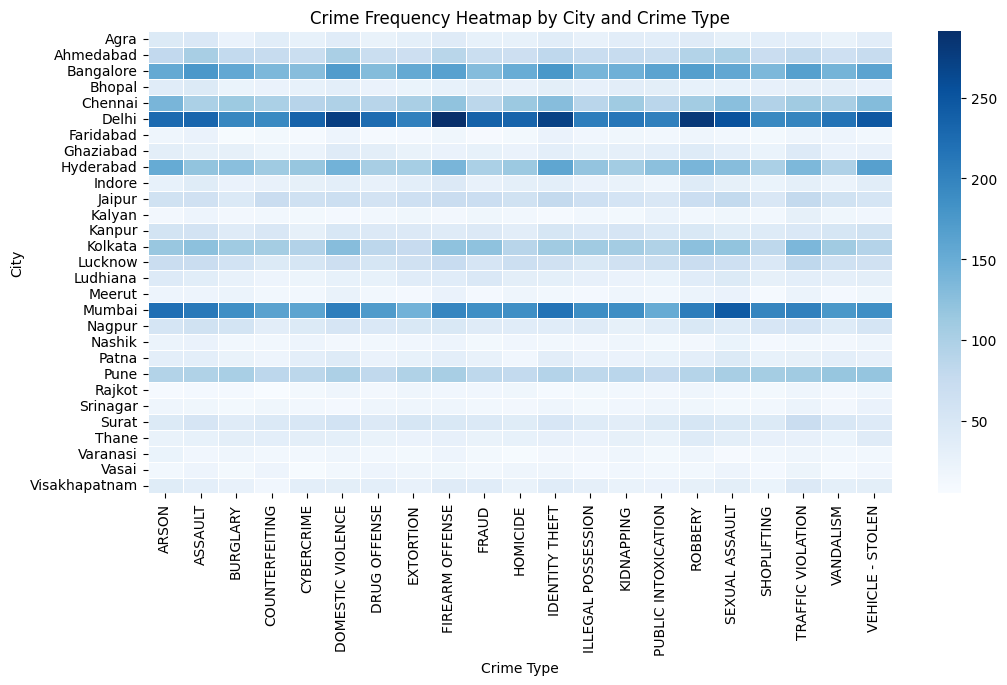

In [25]:
plt.figure(figsize=(12, 6))
city_crime_pivot = df.pivot_table(index="City", columns="Crime Description", aggfunc="size", fill_value=0)
sns.heatmap(city_crime_pivot, cmap="Blues", linewidths=0.5)
plt.xlabel("Crime Type")
plt.ylabel("City")
plt.title("Crime Frequency Heatmap by City and Crime Type")
plt.show()

**4) Distribution of different crime types across genders using a stacked bar chart.**

<Figure size 1400x600 with 0 Axes>

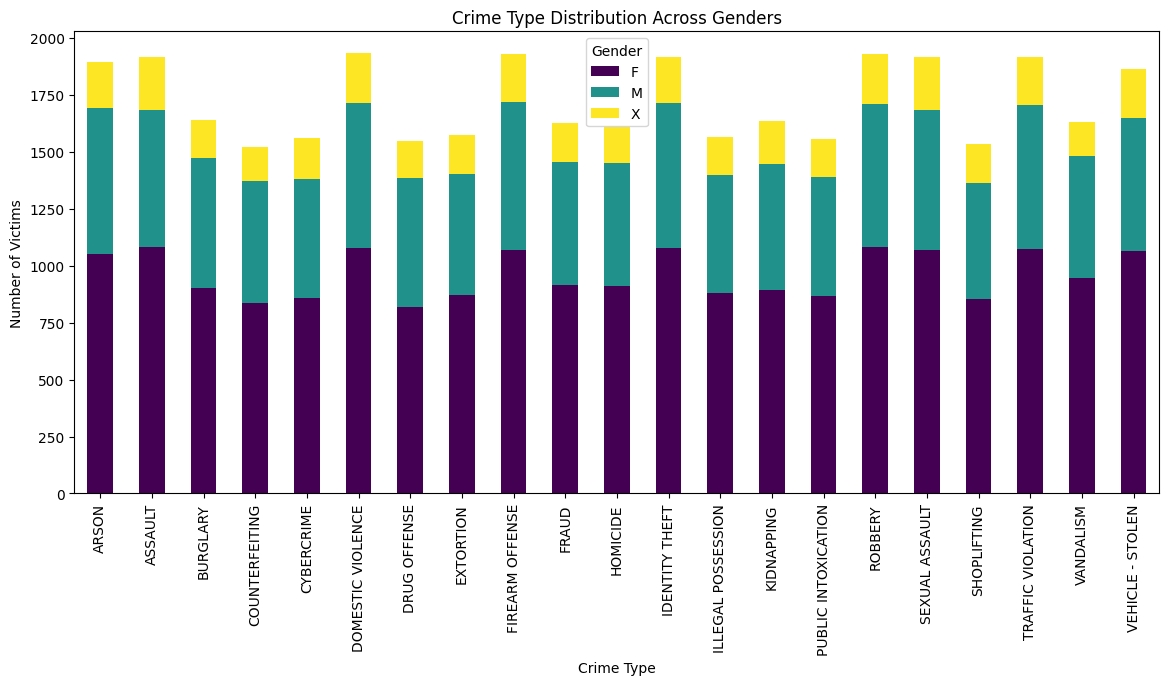

In [15]:
plt.figure(figsize=(14, 6))
crime_gender = df.groupby(["Crime Description", "Victim Gender"]).size().unstack()

crime_gender.plot(kind="bar", stacked=True, figsize=(14, 6), colormap="viridis")
plt.xlabel("Crime Type")
plt.ylabel("Number of Victims")
plt.title("Crime Type Distribution Across Genders")
plt.xticks(rotation=90)
plt.legend(title="Gender")
plt.show()